In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import os
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_score,recall_score,f1_score,balanced_accuracy_score,accuracy_score,r2_score,mean_squared_error
import matplotlib.pyplot as plt


pd.options.display.max_columns=None
pd.options.display.max_rows=100

In [2]:
path = os.path.join("..","WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.read_csv(path)

In [3]:
df["Attrition"] = df["Attrition"].map({"No": 0, "Yes": 1})
df["BusinessTravel"] = df["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1,"Travel_Frequently": 2})
df["OverTime"] = df["OverTime"].map({"No": 0, "Yes": 1})
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df = df.drop(["Over18","StandardHours","EmployeeCount","MaritalStatus"],axis=1)
df = pd.get_dummies(df,columns=["Department","EducationField","JobRole"])

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1,1102,1,2,1,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,2,279,8,1,2,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,1,1373,2,2,4,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,2,1392,3,4,5,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,1,591,2,1,7,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,2061,3,0,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1466,39,0,1,613,6,1,2062,4,0,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1467,27,0,1,155,4,3,2064,2,0,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1468,49,0,2,1023,2,3,2065,4,0,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [5]:
features = df.drop(["Attrition"],axis=1)
label = df["Attrition"]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(features,label,train_size=0.8,random_state=1,shuffle=True,stratify=label)

In [7]:
def training_run_classification(model,parameters,X_train,y_train,X_val,y_val,scoring=None):
    cv = GridSearchCV(model,parameters,cv=4,n_jobs=-1,scoring=scoring)
    cv.fit(X_train,y_train)
    model = cv.best_estimator_
    print(cv.best_params_)
    pred = model.predict(X_val)
    cm = confusion_matrix(y_val,pred)
    acc = accuracy_score(y_val,pred)
    balanced_accuracy = balanced_accuracy_score(y_val,pred)
    precision = precision_score(y_val,pred)
    recall = recall_score(y_val,pred)
    f1 = f1_score(y_val,pred)
    specificity = cm[0,0]/np.sum(cm[0])
    
    print(f"Accuracy: {acc}")
    print(f"Balanced Accuracy: {balanced_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"f1: {f1}")
    print(f"Specificity: {specificity}")
    plot_confusion_matrix(model,X_val,y_val)
    plt.show()

    return model

C:\Users\apate\anaconda3\envs\DSC540\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:27:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'booster': 'gbtree', 'learning_rate': 1, 'max_depth': 2, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 1, 'reg_alpha': 10, 'reg_lambda': 1, 'scale_pos_weight': 3, 'tree_method': 'exact'}
Accuracy: 0.8469387755102041
Balanced Accuracy: 0.7883107933499871
Precision: 0.515625
Recall: 0.7021276595744681
f1: 0.5945945945945946
Specificity: 0.8744939271255061


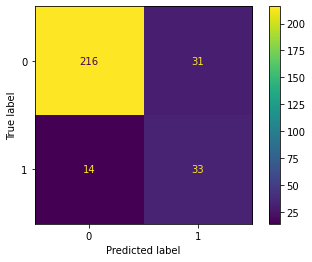

In [76]:
parameters = {
    "n_estimators": [5,25,100,200],
    "max_depth": [None,2,5,10,20],
    "learning_rate": [0.1,1,10],
    "booster": ["gbtree","gblinear","dart"],
    "tree_method": ["exact","approx","hisat"],
    "n_jobs": [-1],
    "reg_alpha": [0.1,1,10],
    "reg_lambda": [0.1,1,10],
    "scale_pos_weight": [3],
    "random_state": [1]
}

xgb = training_run_classification(XGBClassifier(),parameters,x_train,y_train,x_test,y_test,scoring="balanced_accuracy")

C:\Users\apate\anaconda3\envs\DSC540\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:00:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'booster': 'gbtree', 'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 1, 'reg_alpha': 10, 'reg_lambda': 0.1, 'scale_pos_weight': 3, 'tree_method': 'approx'}
Accuracy: 0.8673469387755102
Balanced Accuracy: 0.7832285295891119
Precision: 0.5740740740740741
Recall: 0.6595744680851063
f1: 0.613861386138614
Specificity: 0.9068825910931174


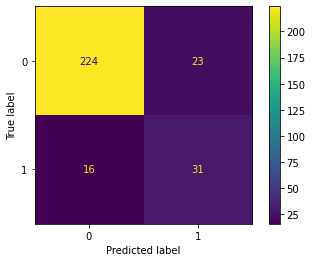

In [90]:
parameters = {
    "n_estimators": [100],
    "max_depth": [None],
    "learning_rate": [0.2],
    "booster": ["gbtree"],
    "tree_method": ["approx"],
    "n_jobs": [-1],
    "reg_alpha": [10],
    "reg_lambda": [0.1],
    "scale_pos_weight": [3],
    "random_state": [1]
}

xgb = training_run_classification(XGBClassifier(),parameters,x_train,y_train,x_test,y_test,scoring="balanced_accuracy")

C:\Users\apate\anaconda3\envs\DSC540\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.56546999 0.59298752        nan ... 0.62156559 0.62112316        nan]
  category=UserWarning


[03:33:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'booster': 'gbtree', 'colsample_bylevel': 0.8, 'colsample_bynode': 0.4, 'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 25, 'random_state': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'scale_pos_weight': 3, 'subsample': 1, 'tree_method': 'exact', 'use_label_encoder': False}
Accuracy: 0.8469387755102041
Balanced Accuracy: 0.7538547678525283
Precision: 0.5178571428571429
Recall: 0.6170212765957447
f1: 0.5631067961165048
Specificity: 0.8906882591093117


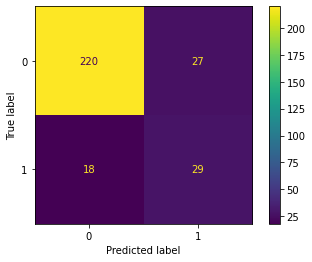

In [16]:
parameters = {
    "n_estimators": [25,100,200],
    "use_label_encoder": [False],
    "learning_rate": [0.01,0.1,1],
    "booster": ["gbtree","gblinear","dart"],
    "tree_method": ["exact","approx","hisat"],
    "subsample": [0.5,0.7,1],
    "colsample_bytree": [0.4,0.6,0.8,1],
    "colsample_bylevel": [0.4,0.6,0.8,1],
    "colsample_bynode": [0.4,0.6,0.8,1],
    "reg_alpha": [0.1],
    "reg_lambda": [0.1],
    "scale_pos_weight": [3],
    "random_state": [1]
}

xgb = training_run_classification(XGBRFClassifier(),parameters,x_train,y_train,x_test,y_test,scoring="balanced_accuracy")